### **Create figures for paper**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from matplotlib.patches import Ellipse

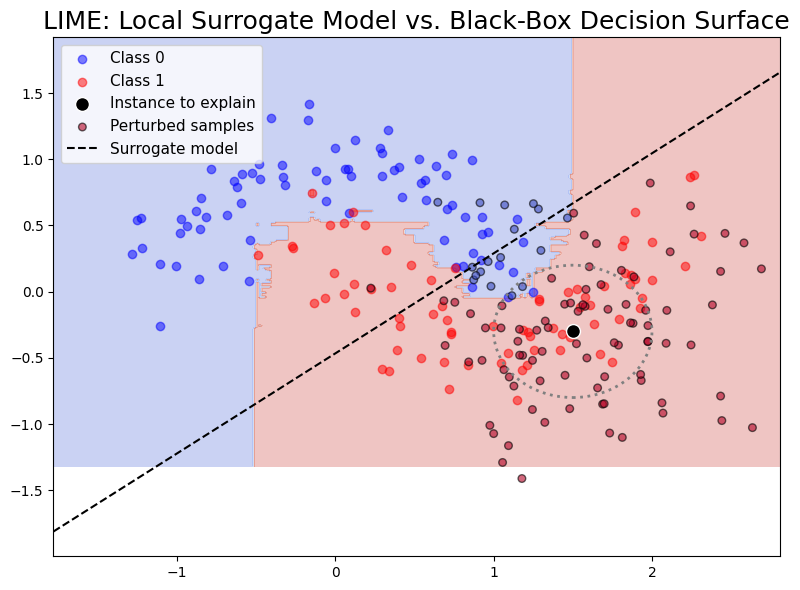

In [7]:
X, y = make_moons(n_samples=150, noise=0.2, random_state=42)

black_box_model = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, random_state=42))
black_box_model.fit(X, y)

instance = np.array([[1.5, -0.3]])

np.random.seed(0)
perturbation_radius = 0.5
perturbed_samples = instance + np.random.normal(0, perturbation_radius, size=(100, 2))
perturbed_preds = black_box_model.predict(perturbed_samples)

surrogate = LogisticRegression()
surrogate.fit(perturbed_samples, perturbed_preds)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
Z = black_box_model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='blue', label='Class 0', alpha=0.5)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='red', label='Class 1', alpha=0.5)
plt.scatter(instance[:, 0], instance[:, 1], c='black', s=100, edgecolor='white', label='Instance to explain')
plt.scatter(perturbed_samples[:, 0], perturbed_samples[:, 1], c=perturbed_preds, cmap='coolwarm', edgecolor='k', alpha=0.6, s=30, label='Perturbed samples')

coef = surrogate.coef_[0]
intercept = surrogate.intercept_[0]
x_vals = np.array([x_min, x_max])
y_vals = -(coef[0] * x_vals + intercept) / coef[1]
plt.plot(x_vals, y_vals, '--', color='black', label='Surrogate model')

ellipse = Ellipse(xy=instance[0], width=1.0, height=1.0, edgecolor='gray', fc='None', lw=2, ls=':')
plt.gca().add_patch(ellipse)

plt.title("LIME: Local Surrogate Model vs. Black-Box Decision Surface", fontsize = 18)
plt.legend(fontsize = 11)
plt.tight_layout()
plt.savefig("../outputs/lime_surrogate.pdf")
plt.show()